### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the datafiles into the dataframe

In [2]:
df = pd.read_excel('New Inventory.xlsx')

### Data Study

In [3]:
print('Top 5 rows of data')
print(df.head(5))
print()
print('Bottom 5 rows of data')
print(df.tail())

Top 5 rows of data
   Item Number Inventory Receive  Total Item Qty
0  064-13-0002        2023-07-07             700
1  064-13-0338        2023-07-07            1700
2  064-13-0340        2023-07-07            1000
3  064-13-0353        2023-07-07            1900
4  064-13-0416        2023-07-07            1000

Bottom 5 rows of data
      Item Number Inventory Receive  Total Item Qty
1034  064-09-3787        2023-07-07            2088
1035  064-09-5287        2023-07-07            1388
1036  064-09-7924        2023-07-07            1632
1037  064-09-9076        2023-07-07            1708
1038  064-09-9115        2023-07-07            1920


In [4]:
print('Number of rows and cols of dataset:',df.shape)
print('Total size of dataset:',df.size)
print('Data Info: ')
print(df.info())

Number of rows and cols of dataset: (1039, 3)
Total size of dataset: 3117
Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Item Number        1039 non-null   object        
 1   Inventory Receive  1039 non-null   datetime64[ns]
 2   Total Item Qty     1039 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.5+ KB
None


### Data Statistics

In [5]:
print('Descriptive Statistics of data:')
print(df.describe())

Descriptive Statistics of data:
                   Inventory Receive  Total Item Qty
count                           1039     1039.000000
mean   2023-08-20 18:55:05.486044160     2393.439846
min              2023-07-07 00:00:00        0.000000
25%              2023-07-10 00:00:00      980.000000
50%              2023-08-16 00:00:00     1664.000000
75%              2023-09-29 00:00:00     2800.000000
max              2023-12-15 00:00:00    23580.000000
std                              NaN     2513.943204


### Checking for null values

In [6]:
df.isnull().sum()

Item Number          0
Inventory Receive    0
Total Item Qty       0
dtype: int64

### Inventory levels at different dates in the future[Weekly Basis] for each item using pandas

In [7]:
df['Inventory Receive'] = pd.to_datetime(df['Inventory Receive'])

df_grouped = df.groupby(['Item Number', pd.Grouper(key='Inventory Receive', freq='W-Mon')]).sum()['Total Item Qty'].reset_index()

df_pivot = df_grouped.pivot(index='Item Number', columns='Inventory Receive', values='Total Item Qty').fillna(0)

df_pivot = df_pivot.astype(int)

df_pivot.columns = df_pivot.columns.strftime('%Y-%m-%d')

df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None

print(df_pivot)


     Item Number  2023-07-10  2023-07-17  2023-07-24  2023-07-31  2023-08-07  \
0    064-01-0003           0           0           0           0           0   
1    064-01-0005           0           0           0           0           0   
2    064-01-0012           0           0           0           0           0   
3    064-01-0013           0           0           0           0           0   
4    064-01-0016           0           0           0           0           0   
..           ...         ...         ...         ...         ...         ...   
208  064-18-9182        8260           0           0        9336        4000   
209  064-18-9667           0           0           0           0           0   
210  064-18-9724        5860           0        1600        2420        1036   
211  064-18-9904           0           0           0           0           0   
212  064-18-9938        2764           0           0        3196        1368   

     2023-08-21  2023-08-28  2023-09-11

### Bar Char for monthly inventory levels

In [8]:
df_month = df.groupby(['Item Number', pd.Grouper(key='Inventory Receive', freq='M')]).sum()['Total Item Qty'].reset_index()

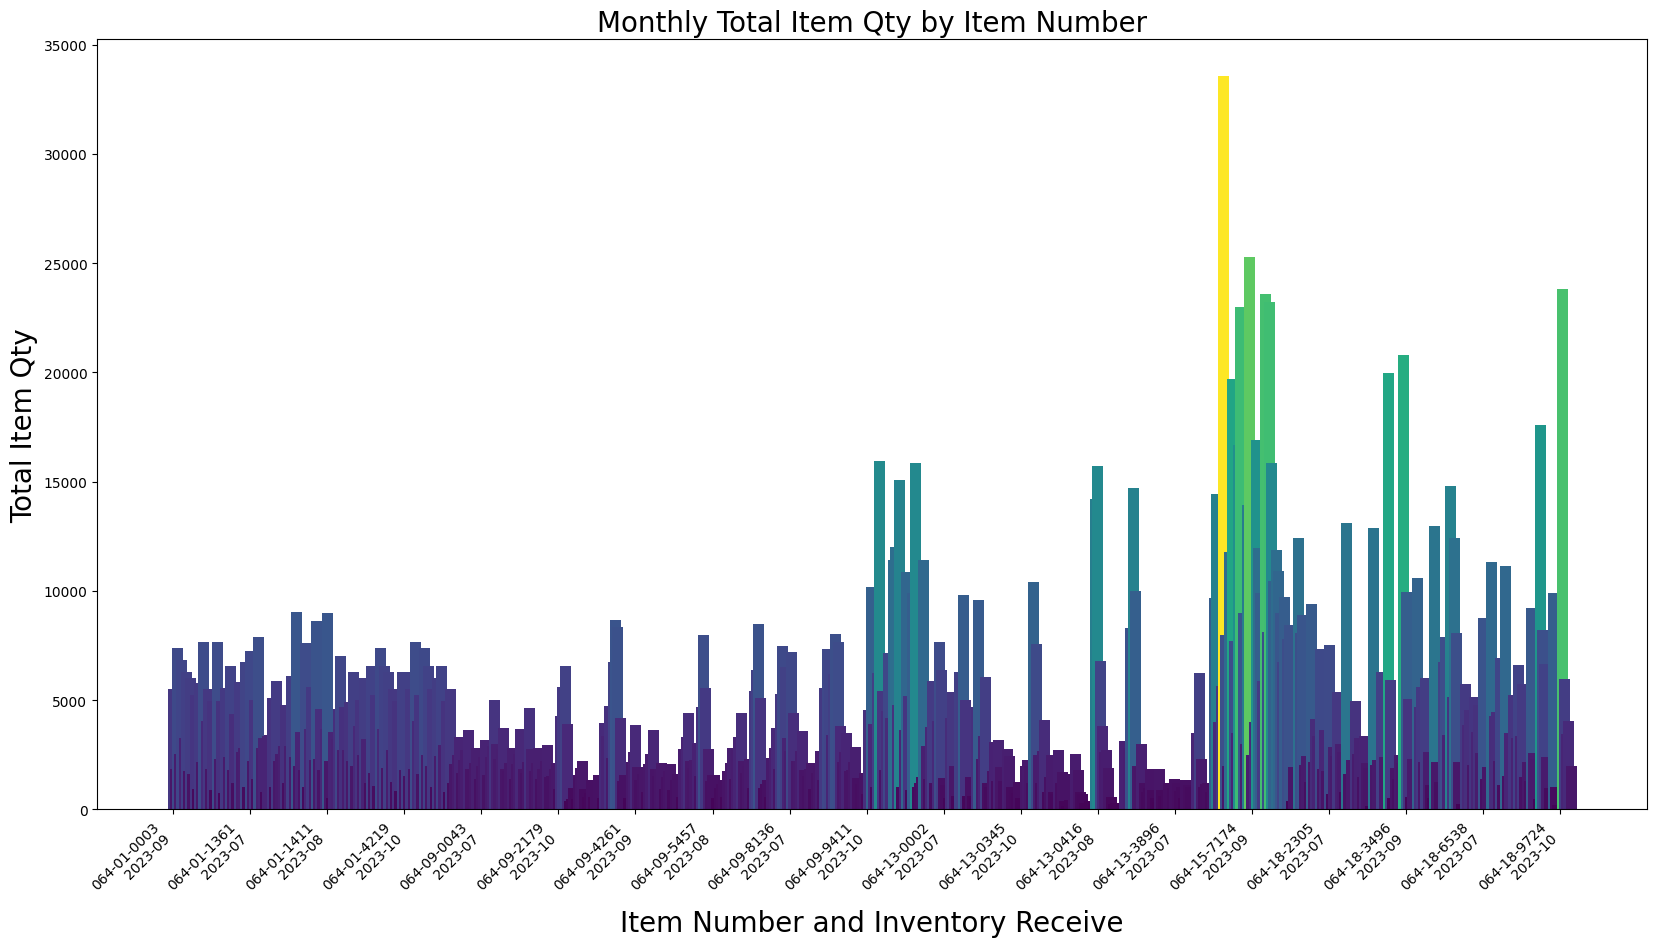

In [9]:
from matplotlib import cm
plt.figure(figsize=(20, 10)) 

norm = plt.Normalize(df_month['Total Item Qty'].min(), df_month['Total Item Qty'].max())
colors = cm.viridis(norm(df_month['Total Item Qty']))
plt.bar(range(len(df_month)), df_month['Total Item Qty'], align='center', color=colors,width=5)

plt.xticks(range(len(df_month)), df_month['Item Number'].astype(str) + '\n' + df_month['Inventory Receive'].dt.strftime('%Y-%m'))

plt.xlabel('Item Number and Inventory Receive', fontsize=20)
plt.ylabel('Total Item Qty',fontsize=20)
plt.title('Monthly Total Item Qty by Item Number',fontsize=20)

plt.xticks(rotation=45, ha='right')

n = 35
plt.xticks(range(0, len(df_month), n), df_month['Item Number'].iloc[::n].astype(str) + '\n' + df_month['Inventory Receive'].iloc[::n].dt.strftime('%Y-%m'))

plt.show()

#### The above bar chart indicates different colors for different Total Item Quantity levels. The x-axis has Item number and it's corresponding month.